In [1]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from tensorflow.keras.models import load_model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sb

In [2]:
model = load_model("CNN.h5")

In [3]:

(x_train , y_train) , (x_test,y_test) = mnist.load_data()
x_train =  x_train/255.0
x_test =  x_test/255.0

x_train = x_train.reshape(x_train.shape[0],x_train[0].shape[0],x_train[0].shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test[0].shape[0],x_test[0].shape[1],1)
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
y_train_pred = model.predict(x=x_train)
y_train_pred = np.argmax(y_train_pred,axis=1)

y_test_pred = model.predict(x=x_test)
y_test_pred = np.argmax(y_test_pred,axis=1)

313/313 [==============================] - 3s 9ms/step


In [5]:
print(y_test_pred)
print(y_train_pred)

[7 2 1 ... 4 5 6]
[5 0 4 ... 5 6 8]


------------------TRAIN REPORT------------------
train accuracy =  0.9962166666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       0.99      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      0.99      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       0.99      1.00      0.99      5851
           9       1.00      0.99      0.99      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



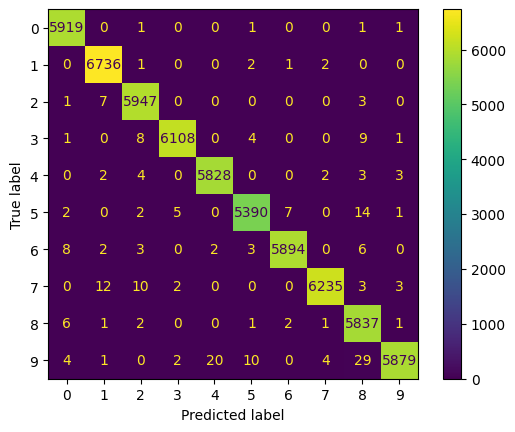

------------------TEST  REPORT------------------
test accuracy =  0.9903
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



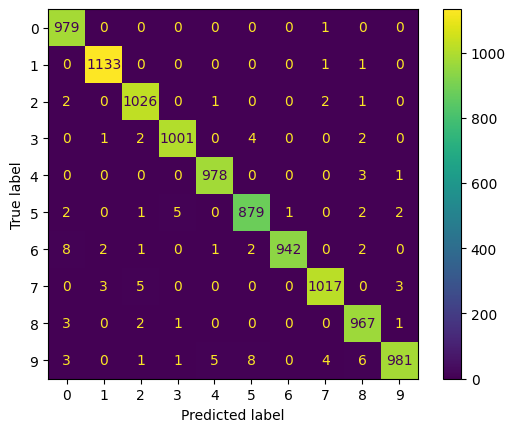

In [6]:
print("------------------TRAIN REPORT------------------")
print("train accuracy = ",accuracy_score(y_true=y_train,y_pred=y_train_pred))
print(classification_report(y_true=y_train,y_pred=y_train_pred))
shw = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_train,y_pred=y_train_pred))
shw.plot()
plt.show()
print("------------------TEST  REPORT------------------")
print("test accuracy = ",accuracy_score(y_true=y_test,y_pred=y_test_pred))
print(classification_report(y_true=y_test,y_pred=y_test_pred))
shw = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test,y_pred=y_test_pred))
shw.plot()
plt.show()

In [7]:
print(x_train.shape)

(60000, 28, 28, 1)


FIRST 20 MISCLASSIFICATIONS FOR TRAINING:


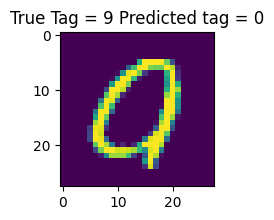

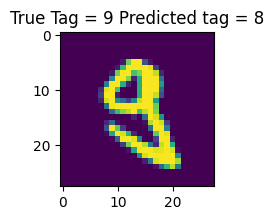

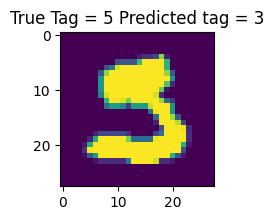

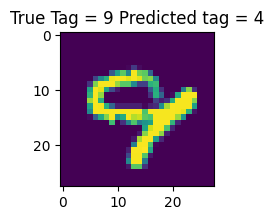

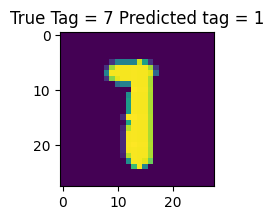

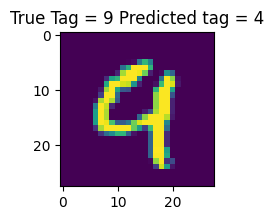

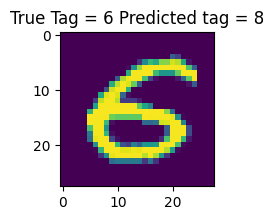

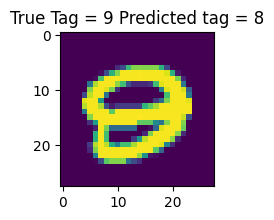

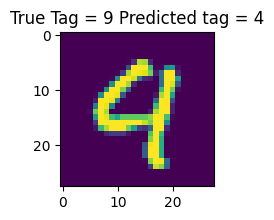

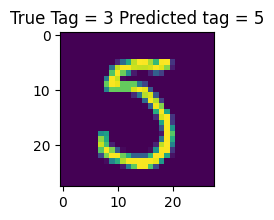

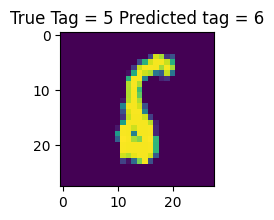

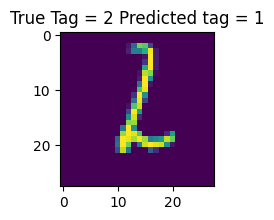

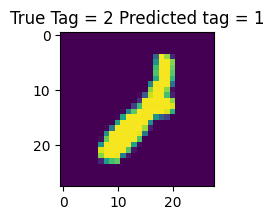

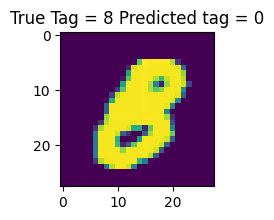

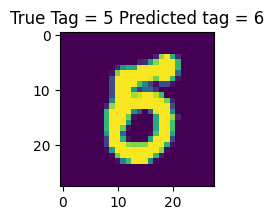

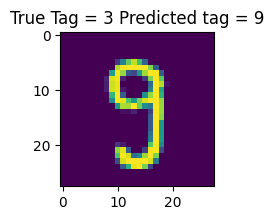

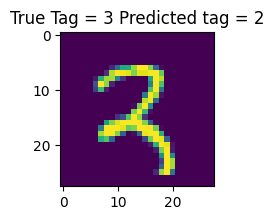

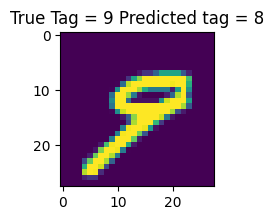

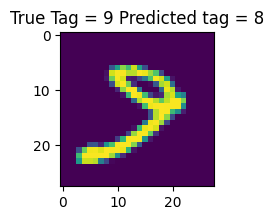

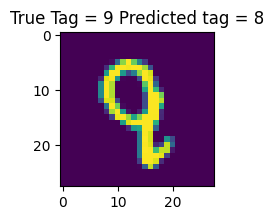

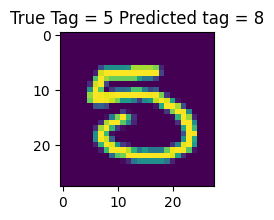

In [22]:
mismatch_train = np.where(y_train!=y_train_pred)[0]
i = 0
print("FIRST 20 MISCLASSIFICATIONS FOR TRAINING:")
for data in mismatch_train:
    if(i>20):
        break
    i+=1
    plt.figure(figsize=(2,2))
    plt.title(f"True Tag = {y_train[data]} Predicted tag = {y_train_pred[data]}")
    plt.imshow(x_train[data])  
    plt.show()

    

FIRST 20 MISCLASSIFICATIONS FOR TESTING:


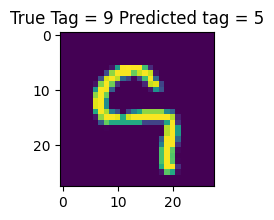

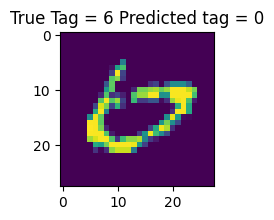

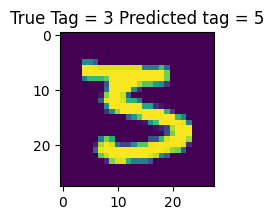

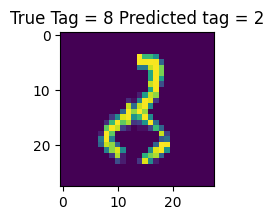

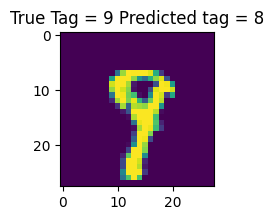

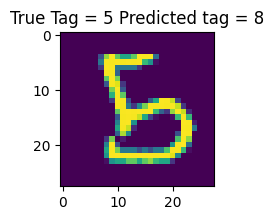

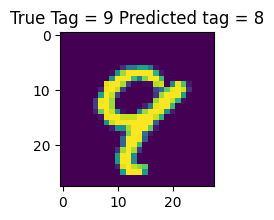

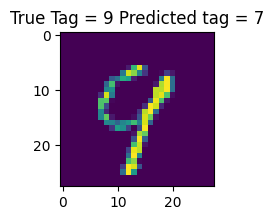

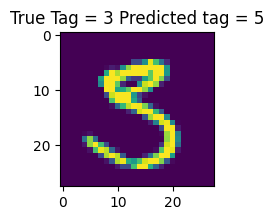

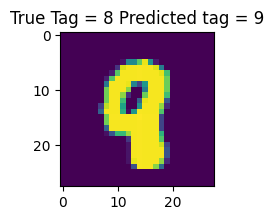

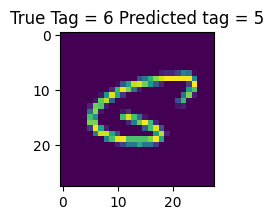

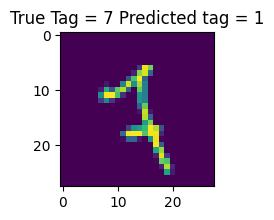

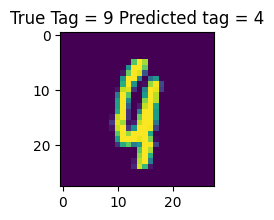

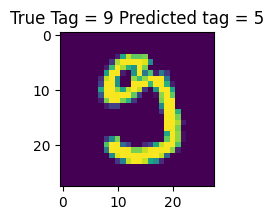

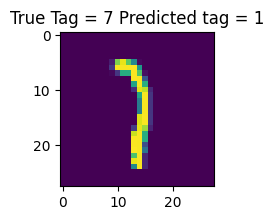

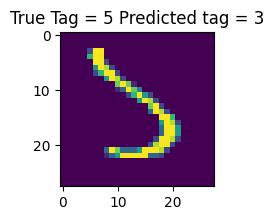

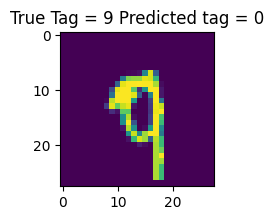

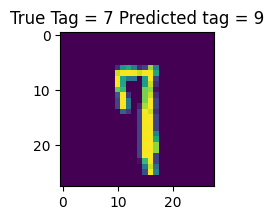

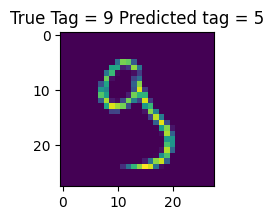

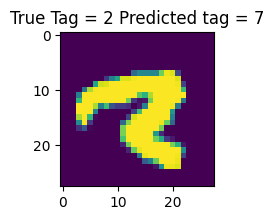

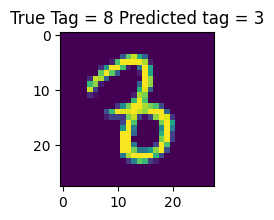

In [24]:
mismatch_train = np.where(y_test!=y_test_pred)[0]
i = 0
print("FIRST 20 MISCLASSIFICATIONS FOR TESTING:")
for data in mismatch_train:
    if(i>20):
        break
    i+=1

    plt.figure(figsize=(2,2))
    plt.title(f"True Tag = {y_test[data]} Predicted tag = {y_test_pred[data]}")
    plt.imshow(x_test[data])  
    plt.show()
    

TRAINING MISCLASSIFICATIONS: 
misclassifications for true label of  0 =  22
misclassifications for true label of  1 =  25
misclassifications for true label of  2 =  31
misclassifications for true label of  3 =  9
misclassifications for true label of  4 =  22
misclassifications for true label of  5 =  21
misclassifications for true label of  6 =  10
misclassifications for true label of  7 =  9
misclassifications for true label of  8 =  68
misclassifications for true label of  9 =  10
Total misclassifications for trainng :  227
TESTING MISCLASSIFICATIONS: 
misclassifications for true label of 0 =  18
misclassifications for true label of 1 =  6
misclassifications for true label of 2 =  12
misclassifications for true label of 3 =  7
misclassifications for true label of 4 =  7
misclassifications for true label of 5 =  14
misclassifications for true label of 6 =  1
misclassifications for true label of 7 =  8
misclassifications for true label of 8 =  17
misclassifications for true label of 9 

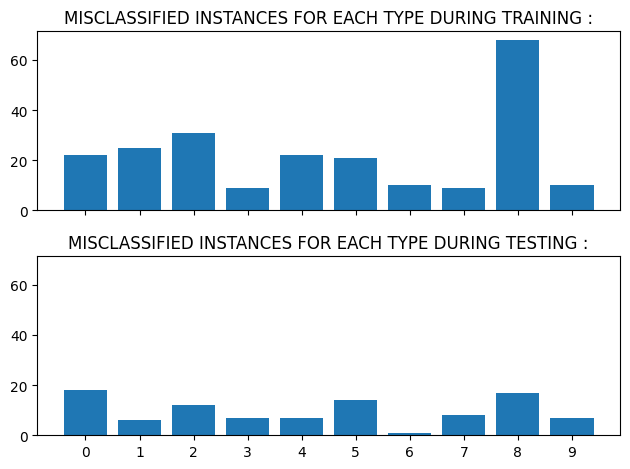

In [32]:
fig, axs = plt.subplots(nrows=2,sharey=True,sharex=True)
print("TRAINING MISCLASSIFICATIONS: ")
conf_mat_train = confusion_matrix(y_true=y_train,y_pred=y_train_pred)
train_label  = conf_mat_train.sum(axis=0)
for i in range(0,10):
    train_label[i]-=conf_mat_train[i][i]
    print("misclassifications for true label of ",i,"= ",train_label[i])
axs[0].bar(x = range(0,len(train_label)),height=train_label)

axs[0].set_title("MISCLASSIFIED INSTANCES FOR EACH TYPE DURING TRAINING :")
print("Total misclassifications for trainng : ",np.sum(train_label))

print("TESTING MISCLASSIFICATIONS: ")
conf_mat_test = confusion_matrix(y_true=y_test,y_pred=y_test_pred)
test_label  = conf_mat_test.sum(axis=0)
for i in range(0,10):
    test_label[i]-=conf_mat_test[i][i]
    print("misclassifications for true label of",i,"= ",test_label[i]) 
print("Total misclassifications for testing : ",np.sum(test_label))
axs[1].bar(x = range(0,len(test_label)),height=test_label)
axs[1].set_title("MISCLASSIFIED INSTANCES FOR EACH TYPE DURING TESTING :")
plt.tight_layout()
plt.xticks(range(0,len(train_label)))
plt.show()


Training Confusion Region : 


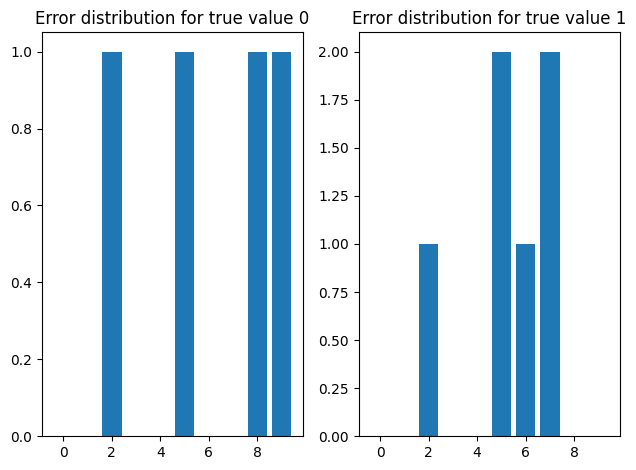

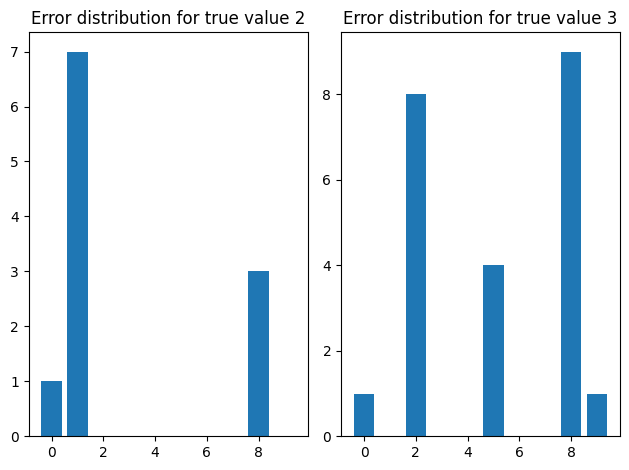

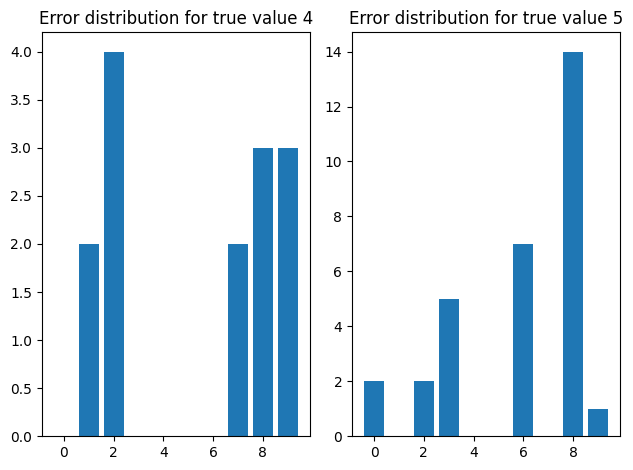

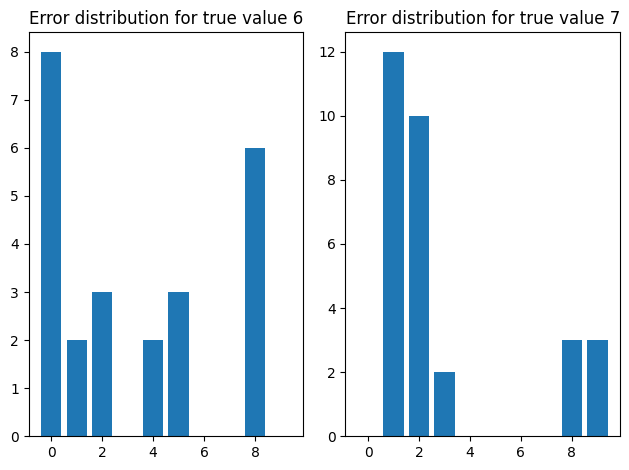

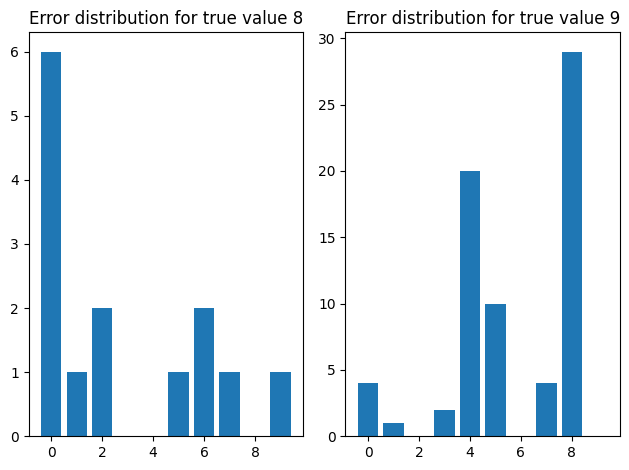

In [11]:
print("Training Confusion Region : ")
conf_mat_train = confusion_matrix(y_true=y_train,y_pred=y_train_pred)
for i in range(0,10,2):
    fig, axs = plt.subplots(ncols=2)
    lst1 = [x for x in range(0,10)]
    lst2 = conf_mat_train[i]
    lst2[i]  = 0
    #plt.figure(figsize=(1,1))
    axs[0].bar(x=lst1,height=lst2)
    axs[0].set_title(f"Error distribution for true value {i}")
    lst2 = conf_mat_train[i+1]
    lst2[i+1]  = 0
    #plt.figure(figsize=(1,1))
    axs[1].bar(x=lst1,height=lst2)
    axs[1].set_title(f"Error distribution for true value {i+1}")
    plt.tight_layout()
    plt.show()

    

Testing Confusion Region : 


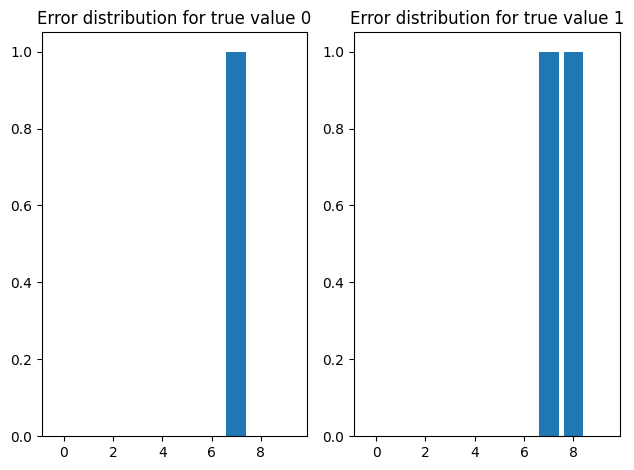

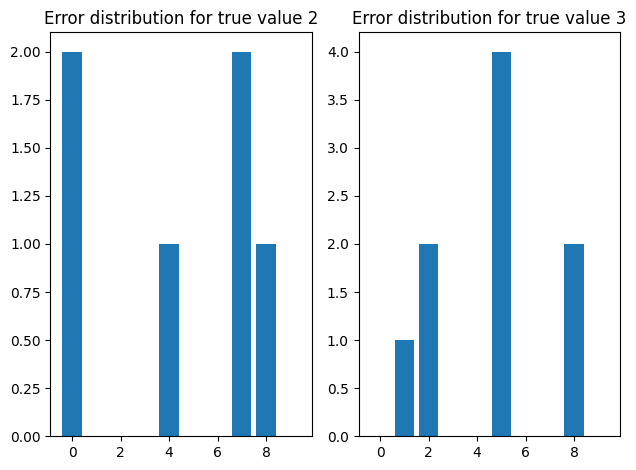

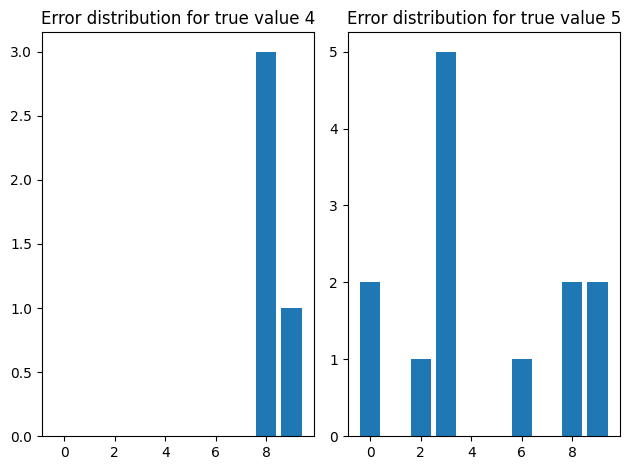

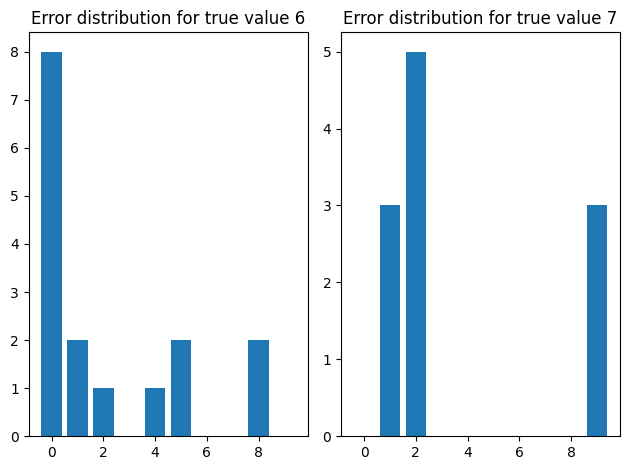

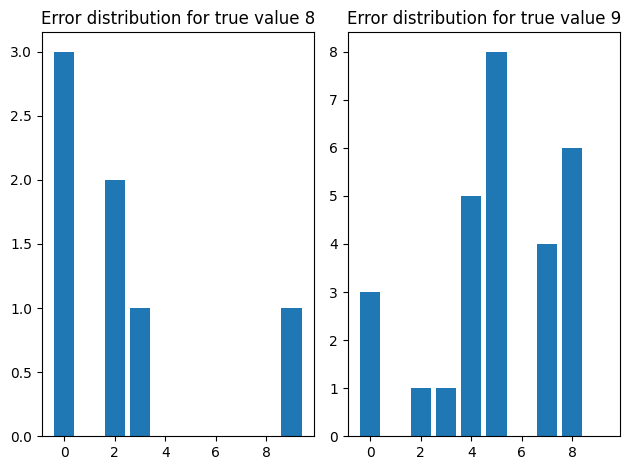

In [33]:
print("Testing Confusion Region : ")
conf_mat_test = confusion_matrix(y_true=y_test,y_pred=y_test_pred)
for i in range(0,10,2):
    fig, axs = plt.subplots(ncols=2)
    lst1 = [x for x in range(0,10)]
    lst2 = conf_mat_test[i]
    lst2[i]  = 0
    #plt.figure(figsize=(1,1))
    axs[0].bar(x=lst1,height=lst2)
    axs[0].set_title(f"Error distribution for true value {i}")
    lst2 = conf_mat_test[i+1]
    lst2[i+1]  = 0
    #plt.figure(figsize=(1,1))
    axs[1].bar(x=lst1,height=lst2)
    axs[1].set_title(f"Error distribution for true value {i+1}")
    plt.tight_layout()
    plt.show()

